In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [17]:
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
# data file path
data = "../data"

In [6]:
# read in csv
# import raw data
gdp_pc_growth_raw = pd.read_csv(data+"/gdp_per_capita_growth_annual_perc/gdp_per_capita_growth_annual_perc.csv", header=2)
gdp_pc_raw = pd.read_csv(data+"/gdp_per_capita_over_time/gdp_per_capita_over_time.csv", header=2)

In [7]:
# rename df
gdp_pc_growth_df = gdp_pc_growth_raw

gdp_pc_df = gdp_pc_raw

## Cleanse data:
1. remove columns with a high proportion (10%) of NaN


In [8]:
# find columns with a large proportion of NaN or blanks
# drop columns with more than 15% na
na_threshold = len(gdp_pc_growth_df)*0.10
print(na_threshold)

gdp_pc_growth_df = gdp_pc_growth_df.dropna(axis=1, thresh=na_threshold)

# remove 2020 data due to the small pandemic which happened, 
gdp_pc_growth_df = gdp_pc_growth_df.drop('2020', axis=1)

# drop indicator code
gdp_pc_growth_df = gdp_pc_growth_df.drop('Indicator Code', axis=1)

# drop country name
gdp_pc_growth_df = gdp_pc_growth_df.drop('Country Name', axis=1)

# drop country name
gdp_pc_growth_df = gdp_pc_growth_df.drop('Indicator Name', axis=1)

26.6


In [9]:
# find columns with a large proportion of NaN or blanks
# drop columns with more than 15% na
na_threshold = len(gdp_pc_df)*0.10
print(na_threshold)

gdp_pc_df = gdp_pc_df.dropna(axis=1, thresh=na_threshold)

# remove 2020 data due to the small pandemic which happened, 
gdp_pc_df = gdp_pc_df.drop('2020', axis=1)
gdp_pc_df = gdp_pc_df.drop('2021', axis=1) # incomplete data

# drop indicator code
gdp_pc_df = gdp_pc_df.drop('Indicator Code', axis=1)

# drop country name
gdp_pc_df = gdp_pc_df.drop('Country Name', axis=1)

# drop country name
gdp_pc_df = gdp_pc_df.drop('Indicator Name', axis=1)

26.6


# Analysis
1. Get list of countries to analyse. We pick these countries for illustration purposes.

In [10]:
list_of_countries = ['AUS', 'CHN', 'DEU', 'GBR', 'JPN', 'KOR', 'ISR', 'USA']
print(list_of_countries)
# Australia, China Germany, UK, Japan, South Korea, Israel, USA

['AUS', 'CHN', 'DEU', 'GBR', 'JPN', 'KOR', 'ISR', 'USA']


In [11]:
# filter df for countries in list_of_countries
gdp_pc_growth_df = gdp_pc_growth_df[gdp_pc_growth_df['Country Code'].isin(list_of_countries)]

# filter df for countries in list_of_countries
gdp_pc_df = gdp_pc_df[gdp_pc_df['Country Code'].isin(list_of_countries)]

In [12]:
# drop if any NaNs exist
gdp_pc_growth_df = gdp_pc_growth_df.dropna(axis=1, how='any')

# drop if any NaNs exist
gdp_pc_df = gdp_pc_df.dropna(axis=1, how='any')

# then list column names to see how long a time series we have
print(gdp_pc_growth_df.columns)

# then list column names to see how long a time series we have
print(gdp_pc_df.columns)

Index(['Country Code', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')
Index(['Country Code', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')


In [13]:
# reset index
gdp_pc_growth_df = gdp_pc_growth_df.reset_index(drop=True)

# reset index
gdp_pc_df = gdp_pc_df.reset_index(drop=True)

In [14]:
# let's plot these over time
# we need to transform the data firstly
plot_gdp_pc_growth_df = gdp_pc_growth_df.T

# let's plot these over time
# we need to transform the data firstly
plot_gdp_pc_df = gdp_pc_df.T

In [15]:
# replace columns with first row
new_header = plot_gdp_pc_growth_df.iloc[0] #grab the first row for the header
plot_gdp_pc_growth_df = plot_gdp_pc_growth_df[1:] #take the data less the header row
plot_gdp_pc_growth_df.columns = new_header #set the header row as the df header

# reset index
plot_gdp_pc_growth_df = plot_gdp_pc_growth_df.reset_index()

# rename index to year
plot_gdp_pc_growth_df = plot_gdp_pc_growth_df.rename(columns={'index': 'Year'})


# replace columns with first row
new_header = plot_gdp_pc_df.iloc[0] #grab the first row for the header
plot_gdp_pc_df = plot_gdp_pc_df[1:] #take the data less the header row
plot_gdp_pc_df.columns = new_header #set the header row as the df header

# reset index
plot_gdp_pc_df = plot_gdp_pc_df.reset_index()

# rename index to year
plot_gdp_pc_df = plot_gdp_pc_df.rename(columns={'index': 'Year'})


In [ ]:
plot_gdp_pc_growth_df.index.name=None

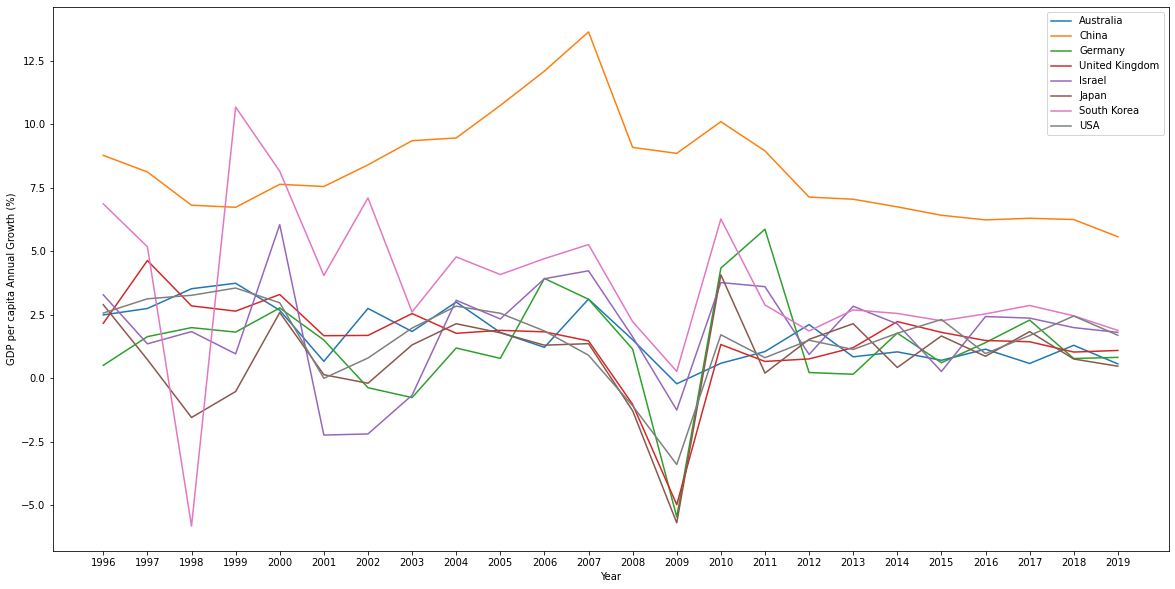

In [18]:
# plot lines
x = plot_gdp_pc_growth_df['Year']
plt.plot(x, plot_gdp_pc_growth_df['AUS'], label = "Australia", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['CHN'], label = "China", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['DEU'], label = "Germany", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['GBR'], label = "United Kingdom", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['ISR'], label = "Israel", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['JPN'], label = "Japan", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['KOR'], label = "South Korea", linestyle="-")
plt.plot(x, plot_gdp_pc_growth_df['USA'], label = "USA", linestyle="-")
plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP per capita Annual Growth (%)")
plt.show()

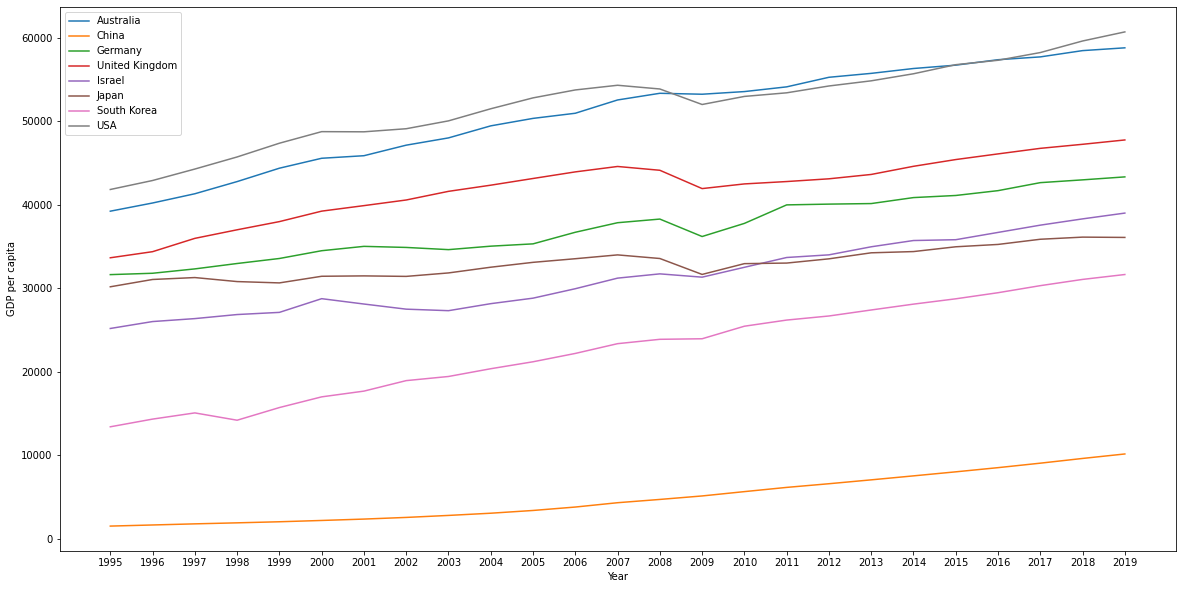

In [19]:
# plot lines
x = plot_gdp_pc_df['Year']
plt.plot(x, plot_gdp_pc_df['AUS'], label = "Australia", linestyle="-")
plt.plot(x, plot_gdp_pc_df['CHN'], label = "China", linestyle="-")
plt.plot(x, plot_gdp_pc_df['DEU'], label = "Germany", linestyle="-")
plt.plot(x, plot_gdp_pc_df['GBR'], label = "United Kingdom", linestyle="-")
plt.plot(x, plot_gdp_pc_df['ISR'], label = "Israel", linestyle="-")
plt.plot(x, plot_gdp_pc_df['JPN'], label = "Japan", linestyle="-")
plt.plot(x, plot_gdp_pc_df['KOR'], label = "South Korea", linestyle="-")
plt.plot(x, plot_gdp_pc_df['USA'], label = "USA", linestyle="-")
plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP per capita")
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()

# Autocorrelation

In [20]:
plot_gdp_pc_growth_df.head(10)

Country Code,Year,AUS,CHN,DEU,GBR,ISR,JPN,KOR,USA
0,1996,2.498885,8.77643,0.514437,2.168065,3.289554,2.900141,6.867624,2.572259
1,1997,2.75232,8.124498,1.643334,4.639177,1.360624,0.740906,5.17963,3.132595
2,1998,3.529349,6.816065,1.998485,2.853814,1.841951,-1.538244,-5.81182,3.270524
3,1999,3.744591,6.733486,1.821428,2.647308,0.966523,-0.515741,10.677451,3.557193
4,2000,2.680865,7.638598,2.773221,3.302608,6.05266,2.592891,8.15269,2.975209
5,2001,0.671693,7.551655,1.510558,1.680457,-2.22967,0.144512,4.051006,0.003649
6,2002,2.75268,8.40488,-0.365628,1.691811,-2.185877,-0.190392,7.104333,0.802104
7,2003,1.845765,9.354777,-0.755077,2.551256,-0.660528,1.318092,2.61404,1.980926
8,2004,3.004315,9.461559,1.197055,1.774938,3.076808,2.151723,4.781286,2.842681
9,2005,1.807784,10.741375,0.788917,1.891276,2.338689,1.79434,4.087645,2.563502


In [21]:
x = plot_gdp_pc_growth_df['AUS']
acf(x, alpha=.05)

(array([ 1.        ,  0.43388991,  0.27753438,  0.20155996,  0.25895494,
         0.26142534,  0.08936202,  0.03851364,  0.24036192,  0.04408856,
        -0.12116208, -0.29823014, -0.27034351, -0.19422439]),
 array([[ 1.        ,  1.        ],
        [ 0.03381394,  0.83396589],
        [-0.19185567,  0.74692443],
        [-0.29339912,  0.69651903],
        [-0.2489721 ,  0.76688198],
        [-0.26721109,  0.79006178],
        [-0.45957752,  0.63830156],
        [-0.51274943,  0.58977671],
        [-0.31133166,  0.7920555 ],
        [-0.52411956,  0.61229668],
        [-0.68991749,  0.44759333],
        [-0.87110201,  0.27464173],
        [-0.86754883,  0.3268618 ],
        [-0.81070672,  0.42225794]]))

AUS
CHN
DEU
GBR
JPN
KOR
ISR
USA


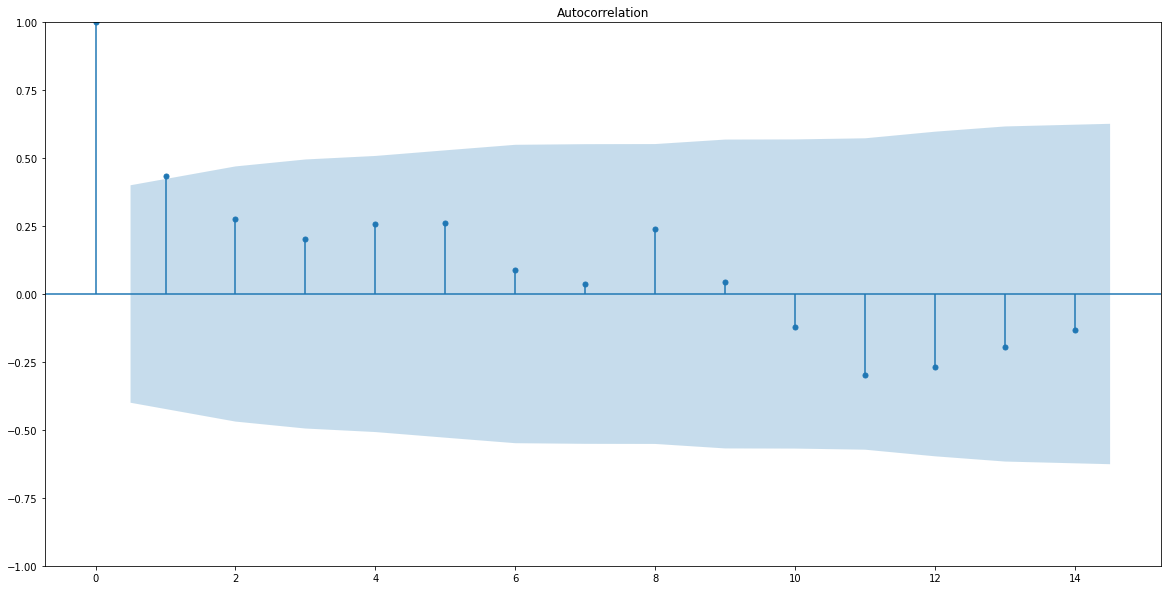

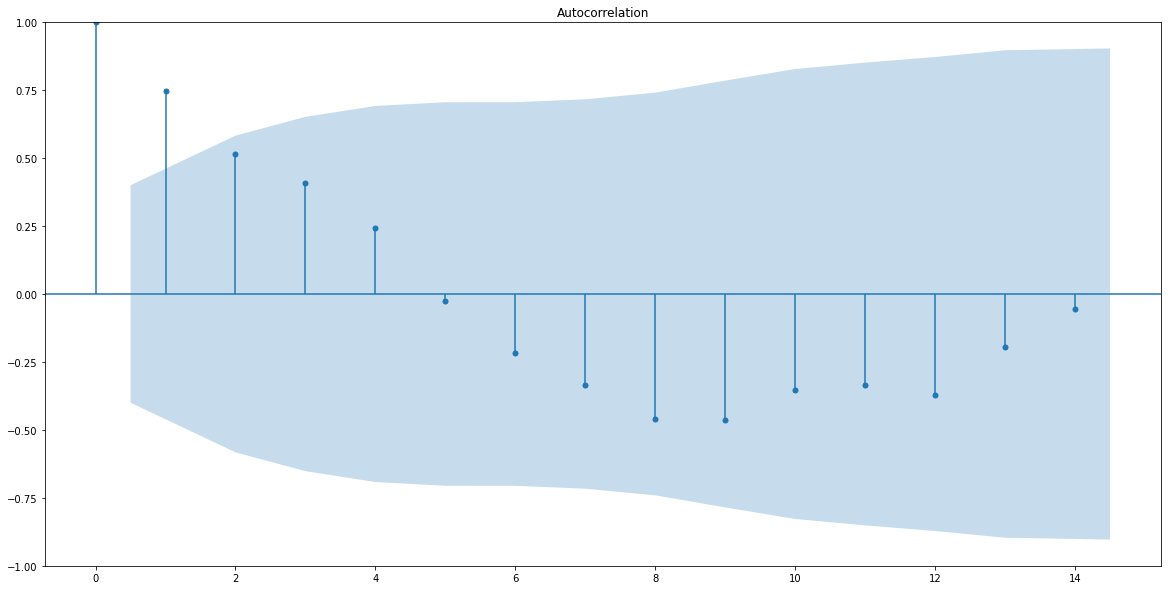

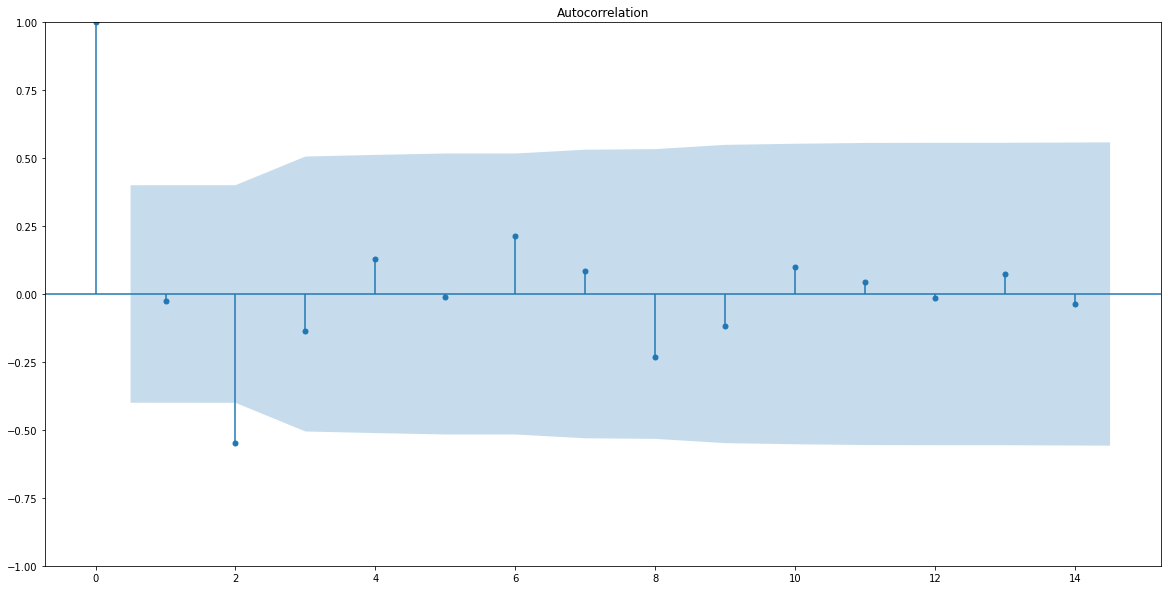

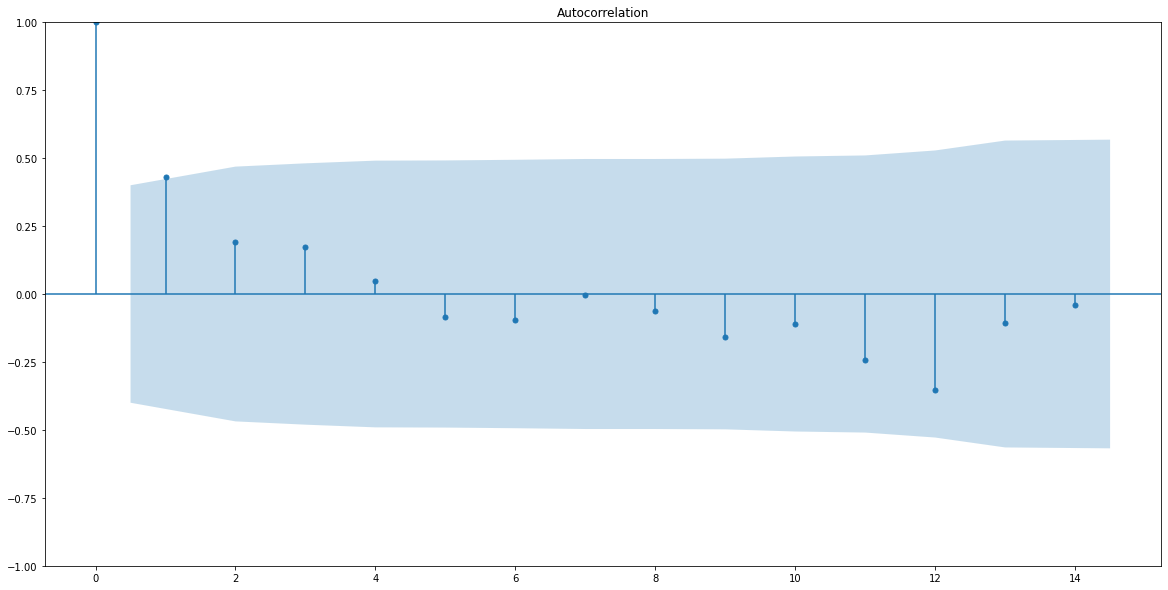

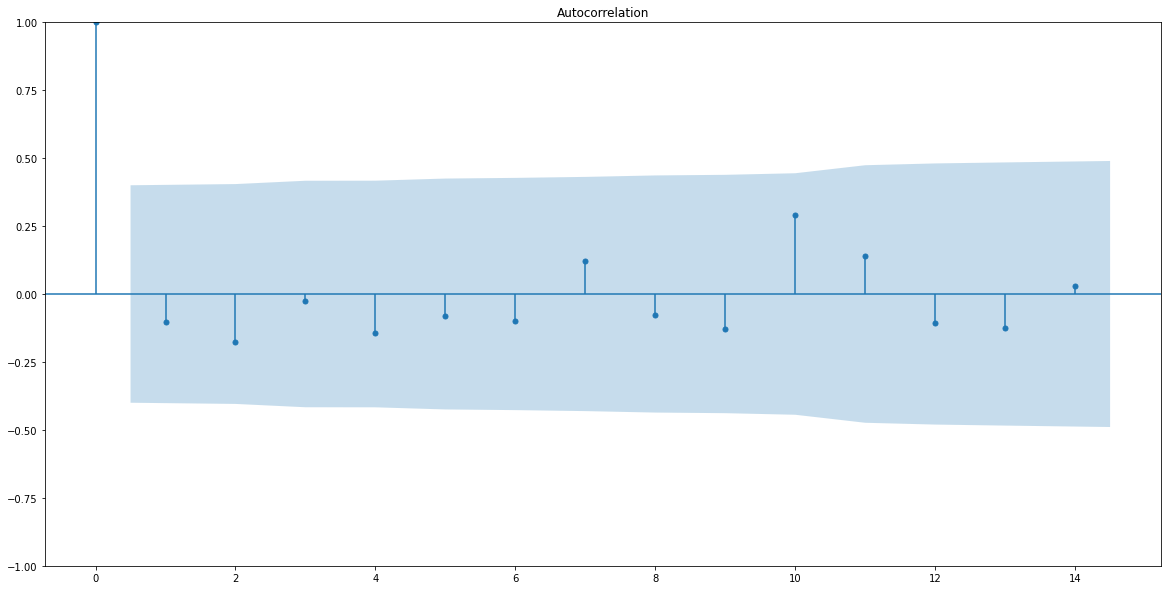

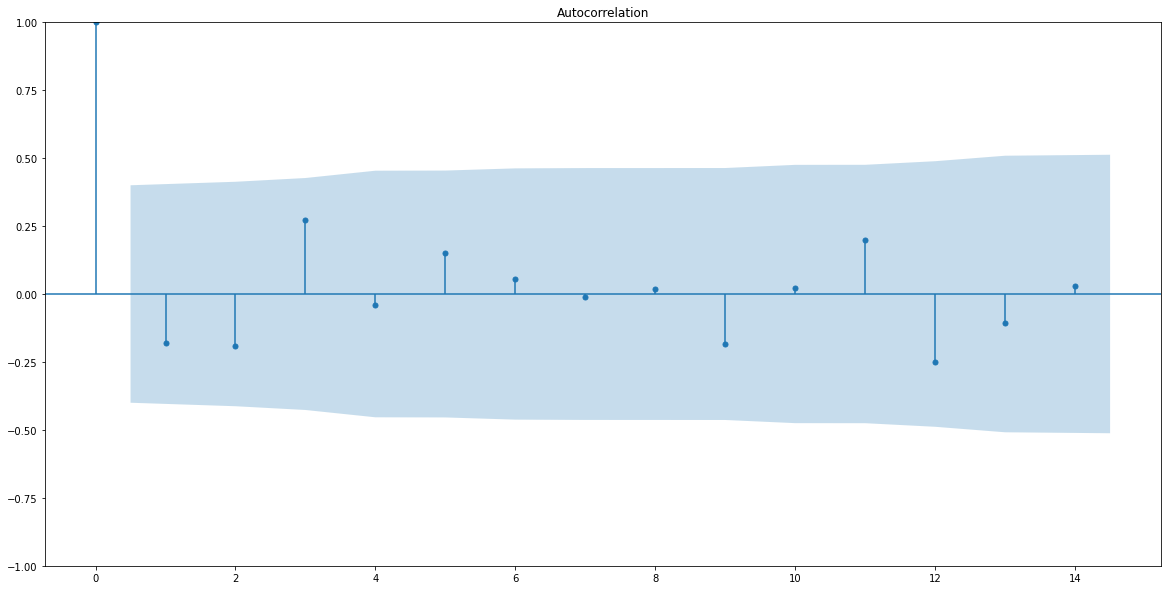

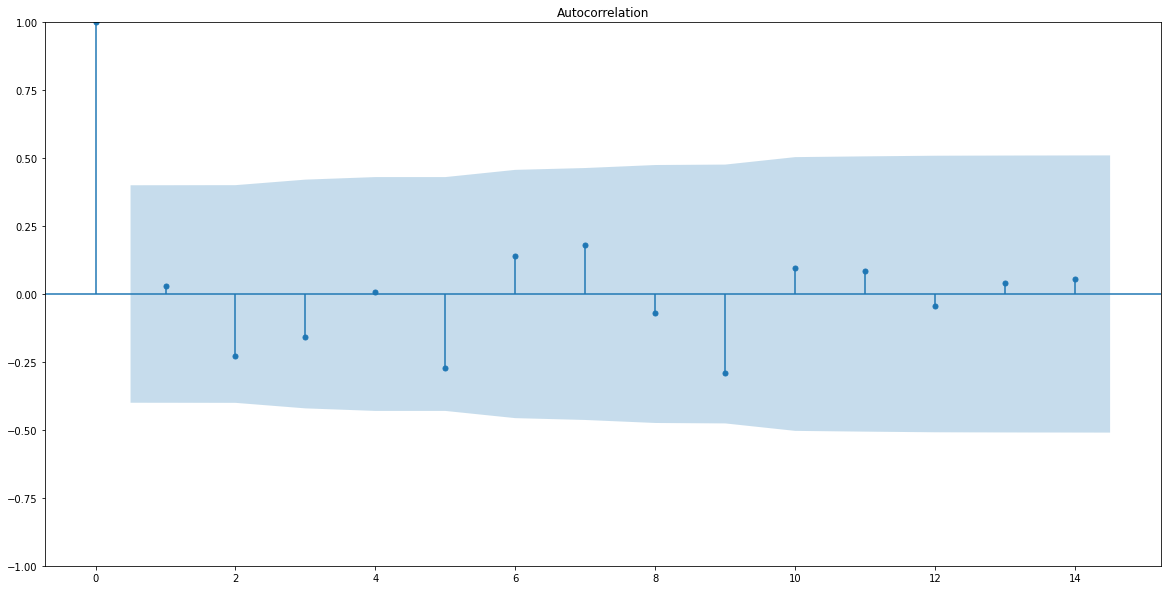

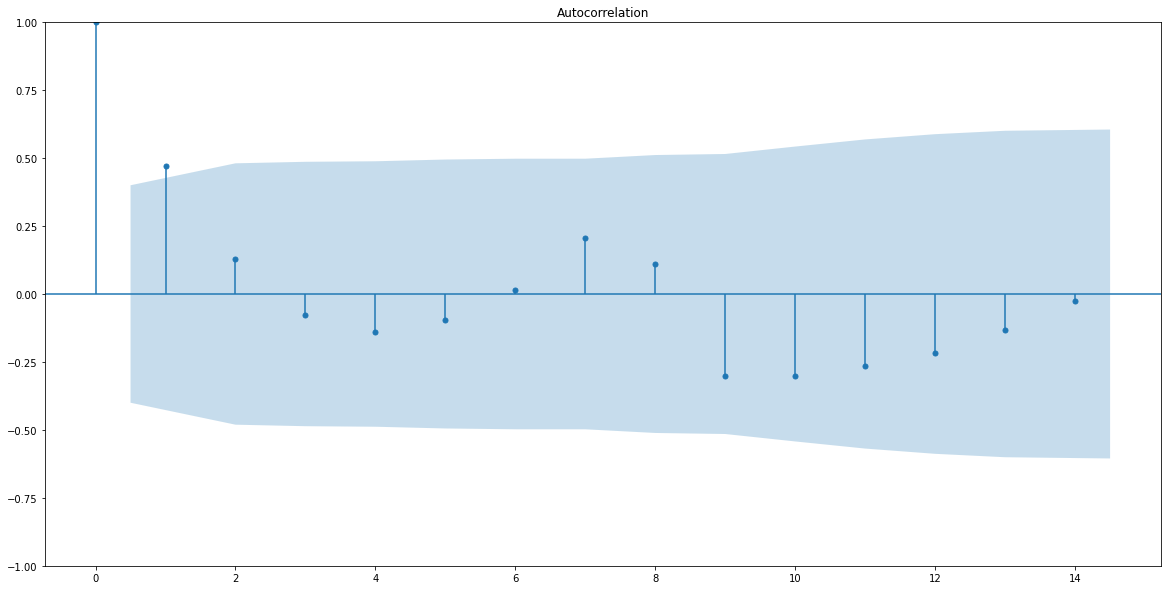

In [22]:
for i in list_of_countries:
    print(i)
    plot_acf(plot_gdp_pc_growth_df[i], alpha=.05)